In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Evaluate the improved model

### Subtask:
Evaluate the performance of the modified or retrained model on the validation set.

**Reasoning**:
Evaluate the performance of the retrained model on the validation set and print the results.

In [ ]:
import pandas as pd
import os

# Define the path to your dataset file in Google Drive
# IMPORTANT: Replace '/content/drive/MyDrive/path/to/fer2013.csv' with the actual path to your fer2013.csv file
dataset_path = '/content/drive/MyDrive/archive (1)/fer2013.csv'

# Check if the file exists
if not os.path.exists(dataset_path):
    print(f"Error: Dataset not found at {dataset_path}")
else:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Display the first few rows and the information about the dataset
    print("Dataset loaded successfully.")
    display(df.head())
    df.info()

Dataset loaded successfully.


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

## Preprocessing the Data

Now that we have loaded the data, we need to preprocess it for our CNN model. This involves:

1.  **Converting pixel strings to NumPy arrays**: The 'pixels' column contains space-separated strings of pixel values. We need to convert each string into a numerical NumPy array.
2.  **Reshaping the pixel data**: The FER2013 dataset contains 48x48 pixel grayscale images. We need to reshape the 1D array of pixel values into a 2D shape of 48x48, and add a channel dimension for grayscale (making it 48x48x1).
3.  **Normalizing pixel values**: Pixel values typically range from 0 to 255. Normalizing these values to be between 0 and 1 helps in training the CNN model more effectively. We achieve this by dividing each pixel value by 255.
4.  **One-hot encoding the emotion labels**: The 'emotion' column contains integer labels representing the emotion classes (0 to 6). For training a classification model, it's standard practice to convert these integer labels into a one-hot encoded format. In one-hot encoding, each integer label is converted into a binary vector of length equal to the number of classes, with a '1' at the index corresponding to the class and '0' elsewhere.

In [ ]:
# 1
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert pixel strings to numpy arrays and reshape
# The pixels are given as space-separated strings
X = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in df['pixels']])

# Reshape the data to 48x48 images (grayscale)
# The images are 48x48 pixels. The -1 automatically calculates the number of images.
# The 1 at the end represents the single channel for grayscale.
X = X.reshape(-1, 48, 48, 1)

# Normalize pixel values to be between 0 and 1
# CNNs typically perform better with normalized input.
X = X / 255.0

# One-hot encode the emotion labels
# There are 7 emotion classes in FER2013. to_categorical converts integer labels to one-hot vectors.
y = to_categorical(df['emotion'], num_classes=7)

print("Preprocessing complete.")
print("Shape of image data (X):", X.shape)
print("Shape of labels (y):", y.shape)

Preprocessing complete.
Shape of image data (X): (35887, 48, 48, 1)
Shape of labels (y): (35887, 7)


## Building the CNN Model

We will build a Convolutional Neural Network (CNN) model using TensorFlow and Keras. CNNs are well-suited for image classification tasks. Our model will consist of:

1.  **Convolutional Layers (`Conv2D`)**: These layers apply filters to the input images to extract features. We will use multiple convolutional layers with increasing numbers of filters to learn more complex features.
2.  **Activation Function (`relu`)**: The Rectified Linear Unit (ReLU) activation function introduces non-linearity into the model, allowing it to learn more complex patterns.
3.  **Pooling Layers (`MaxPooling2D`)**: These layers downsample the feature maps, reducing the spatial dimensions and the number of parameters, which helps to prevent overfitting.
4.  **Dropout Layers (`Dropout`)**: These layers randomly set a fraction of the input units to zero during training, which also helps to prevent overfitting.
5.  **Flatten Layer (`Flatten`)**: This layer flattens the output from the convolutional and pooling layers into a 1D vector, which can be fed into the dense layers.
6.  **Dense Layers (`Dense`)**: These are fully connected layers that perform the classification based on the features extracted by the convolutional layers.
7.  **Output Layer (`Dense`)**: The final dense layer has units equal to the number of emotion classes (7 in this case) and uses a softmax activation function to output the probability distribution over the classes.

## Compiling the Model

Before training the model, we need to compile it. This step configures the model for the training process by defining:

1.  **Optimizer**: The algorithm used to update the model's weights during training (e.g., Adam, SGD). We'll use the Adam optimizer, which is a popular choice for deep learning models.
2.  **Loss Function**: The function that measures how well the model is performing. For multi-class classification like this, 'categorical\_crossentropy' is a standard choice when using one-hot encoded labels.
3.  **Metrics**: The metrics used to evaluate the model's performance during training and testing (e.g., accuracy). We'll use 'accuracy' to track the percentage of correctly classified emotions.

## Training the Model

Now we will train the compiled CNN model using our preprocessed data. We will split the data into training and validation sets to evaluate the model's performance on unseen data during the training process.

- **Training Data**: Used to train the model.
- **Validation Data**: Used to monitor the model's performance during training and tune hyperparameters.

## Evaluating the Model

After training, it's important to evaluate the model's performance on a separate dataset (the validation set in this case) to get an idea of how well it will perform on new, unseen data. We will use the `evaluate` method of the Keras model to calculate the loss and accuracy on the validation set.

**Reasoning**:
Modify the CNN model architecture to include L2 regularization in the convolutional and dense layers.

## Compile the model

### Subtask:
Compile the modified CNN model by defining the optimizer, loss function, and metrics.

**Reasoning**:
Compile the modified CNN model using the Adam optimizer, categorical crossentropy loss, and accuracy metric.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
# Using Adam optimizer, categorical crossentropy loss for one-hot encoded labels, and accuracy as a metric.
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization, Input)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ============================
# 1. Load Cleaned Dataset
# ============================
dataset_path = "/content/drive/MyDrive/archive (1)/fer2013_cleaned.csv"
df = pd.read_csv(dataset_path)

print(f"✅ Dataset loaded: {df.shape}")

# ============================
# 2. Prepare Data
# ============================
# Convert pixels to numpy arrays
X = np.array([np.fromstring(pixels, sep=' ') for pixels in df['pixels']])
y = df['emotion'].values

# Normalize
X = X / 255.0

# Reshape for CNN (48x48x1 grayscale)
X = X.reshape(-1, 48, 48, 1)

# One-hot encode labels
y_cat = to_categorical(y, num_classes=7)

# Split train/val/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# ============================
# 3. Data Augmentation
# ============================
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# ============================
# 4. Compute Class Weights
# ============================
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)
class_weights = dict(enumerate(class_weights))
print("⚖️ Class Weights:", class_weights)

# ============================
# 5. Build CNN Model
# ============================
model = Sequential([
    Input(shape=(48,48,1)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(7, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ============================
# 6. Training with Augmentation
# ============================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, min_lr=1e-6)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=40,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr]
)

# ============================
# 7. Evaluation
# ============================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=[
    "Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"
]))


✅ Dataset loaded: (35852, 3)
Train: (28681, 48, 48, 1), Val: (3585, 48, 48, 1), Test: (3586, 48, 48, 1)
⚖️ Class Weights: {0: np.float64(1.0362381674976515), 1: np.float64(9.37593984962406), 2: np.float64(1.0025166905519243), 3: np.float64(0.5698589310550367), 4: np.float64(0.8427161074219898), 5: np.float64(1.2820042910781333), 6: np.float64(0.8268992359809716)}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,510,215 (13.39 MB)

 Trainable params: 3,507,911 (13.38 MB)

 Non-trainable params: 2,304 (9.00 KB)

Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.1677 - loss: 2.5136 - val_accuracy: 0.2605 - val_loss: 1.8723 - learning_rate: 0.0010
Epoch 2/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.2011 - loss: 2.0175 - val_accuracy: 0.2940 - val_loss: 1.7776 - learning_rate: 0.0010
Epoch 3/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.2600 - loss: 1.8194 - val_accuracy: 0.2884 - val_loss: 1.7855 - learning_rate: 0.0010
Epoch 4/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.2899 - loss: 1.7458 - val_accuracy: 0.3802 - val_loss: 1.6033 - learning_rate: 0.0010
Epoch 5/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.3607 - loss: 1.6384 - val_accuracy: 0.4067 - val_loss: 1.5494 - learning_rate: 0.0010
Epoch 6/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.4114 - loss: 1.5191 - val_accuracy: 0.4234 - val_loss: 1.4712 - learning_rate: 0.0010
Epoch 7/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.4432 - loss: 1.4463

In [ ]:
# Save model in HDF5 format
model.save("/content/drive/MyDrive/archive (1)/fer2013_emotion_cnn.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


Saving young-happy-black-man-29680442.png to young-happy-black-man-29680442.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Predicted Emotion: Neutral
Probabilities: {'Angry': np.float32(0.193), 'Disgust': np.float32(0.001), 'Fear': np.float32(0.08), 'Happy': np.float32(0.042), 'Sad': np.float32(0.26), 'Surprise': np.float32(0.008), 'Neutral': np.float32(0.416)}


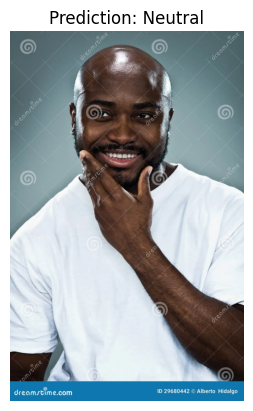

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("/content/drive/MyDrive/archive (1)/fer2013_emotion_cnn.h5")

# Emotion labels
emotion_labels = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]

# Upload image manually
from google.colab import files
uploaded = files.upload()

# Pick the uploaded file
img_path = list(uploaded.keys())[0]

# Load image in RGB format
img = cv2.imread(img_path, cv2.IMREAD_COLOR) # Load in color
img = cv2.resize(img, (48,48))   # FER2013 is 48x48

# Preprocess
img = img.astype("float32") / 255.0
# No need to add channel dimension for grayscale, as cv2.imread(..., cv2.IMREAD_COLOR) already loads with 3 channels
img = np.expand_dims(img, axis=0)   # shape (1,48,48,3)

# Predict
pred = model.predict(img)[0]
emotion = emotion_labels[np.argmax(pred)]

print("Predicted Emotion:", emotion)
print("Probabilities:", dict(zip(emotion_labels, pred.round(3))))

# Show image
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {emotion}")
plt.axis("off")
plt.show()